# AIML 302 Part 8 - Exercises with answers

## Exercise 1

#### Task 1
##### Load libraries that are used in this module.

#### Result:

In [1]:
# Helper packages.
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Packages for loading pre-trained word-embedding model
import gensim
from gensim.models import Word2Vec

#### Task 2 
##### Set `data_dir` to the data directory.

#### Result:

In [2]:
data_dir = "/home/jovyan/iqvia-aiml-302/data"


#### Task 3
#####  Load the corpus from `UN_agreement_titles.csv` into a new variable `agreements`.
##### Make a series from the dataframe that contains only the `title` column of `agreements` and name it `titles`.
##### Tokenize each title in the series `titles` and assign it to `ex_titles_tokenized`.


#### Result:

In [4]:
# Load corpus from a text document.
agreements  = pd.read_csv(data_dir + '/UN_agreement_titles.csv')
titles = agreements["title"]
ex_titles_tokenized = [word_tokenize(titles[i]) for i in range(0,len(titles))]


#### Task 4
##### Define and run a cleaning function to convert to lower case, remove stop words, remove punctuation and any non-alphabetical characters on the list `ex_titles_tokenized` and return `ex_titles_clean_list` and `ex_titles_clean`
##### Create an empty list `ex_titles_clean_not_stemmed` for clean titles whose length is same as `ex_titles_tokenized` 
##### Clean tokens for each title in `ex_titles_clean_list` using the cleaning function

#### Result:

In [5]:
def cleaning(ex_titles_clean, ex_titles_tokenized):

# Process words in all documents.
    for i in range(len(ex_titles_tokenized)):
    # 1. Convert to lower case.
        ex_titles_clean[i] = [titles.lower() for titles in ex_titles_tokenized[i]]
    
    # 2. Remove stopwords.
        ex_titles_clean[i] = [word for word in ex_titles_clean[i] if not word in stop_words]
    
    # 3. Remove punctuation and any non-alphabetical characters.
        ex_titles_clean[i] = [word for word in ex_titles_clean[i] if word.isalpha()]
    
    ex_titles_clean_list = [' '.join(snippet) for snippet in ex_titles_clean]
    return ex_titles_clean_list, ex_titles_clean

In [6]:
# Create a vector for clean titles.
ex_titles_clean_not_stemmed = [None] * len(ex_titles_tokenized)

ex_titles_clean_list,ex_titles_clean = cleaning(ex_titles_clean_not_stemmed,ex_titles_tokenized)

#### Task 5
##### Initialize `CountVectorizer`
##### Transform the list of titles into DTM and show output as a matrix
##### Convert the matrix into a pandas dataframe for easier manipulation

#### Result:

In [7]:
vec = CountVectorizer()
X = vec.fit_transform(ex_titles_clean_list)
ex_DTM_not_stemmed = pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())


#### Task 6

##### Load the pre-trained glove embeddings and save as `glove_file`. 
##### We will be loading the file with vector size of 200. 

##### Define `LoadGloveModel()` function as we did in class to extract workd embeddings from the glove file. 
##### Save the outputs from `LoadGloveModel` function as `ex_glove_model`. 

#### Result: 

In [8]:
# Number of glove dimensions.
GLOVE_DIM = 200

# Load pre-trained glove embeddings.
glove_file = data_dir + "/glove.6B.200d.txt"

In [9]:
# Note: Use f = open(glove_file,'r', encoding= 'utf-8') if unicode errors occur

def LoadGloveModel(glove_file):
    print("Loading Glove Model")
    f = open(glove_file,'r',encoding="utf8")
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.", len(model), " words loaded!")
    return model

# Load embedings from file.
ex_glove_model = LoadGloveModel(glove_file)

Loading Glove Model
Done. 400000  words loaded!


#### Task 7
##### Create a frequency count of each word in the corpus using `ex_DTM_not_stemmed`  and save it to `ex_corpus_freq_dist`.
##### Save `ex_corpus_freq_dist` as a dataframe named `ex_word_counts`.

#### Result:

In [10]:
# Save series as a dictionary.
ex_corpus_freq_dist = ex_DTM_not_stemmed.sum(axis = 0).to_dict()
dict(list(ex_corpus_freq_dist.items())[0:5])

{'aagreement': 1,
 'ababa': 1,
 'abolition': 12,
 'accommodation': 1,
 'accordance': 1}

In [11]:
# Extract word counts for exploratory analysis.
ex_word_counts = pd.DataFrame(list(ex_corpus_freq_dist.items()), columns = ['word', 'count'])

In [12]:
print(ex_word_counts.head())

            word  count
0     aagreement      1
1          ababa      1
2      abolition     12
3  accommodation      1
4     accordance      1


#### Task 8
##### Iniitialize the following variables as shown:

In [13]:
# Initialize embeddings matrix.
ex_DICT_SIZE = len(ex_word_counts.index)
ex_word_emb_matrix = np.zeros((ex_DICT_SIZE, GLOVE_DIM))
ex_words = list(ex_word_counts.word)
ex_NUM_MESSAGES = len(ex_titles_clean_not_stemmed)

##### Create a loop to extract the vectors from `glove_model` and save to `ex_word_emb_matrix`.
##### Print its shape and the first vector.
#### Result:

In [14]:
for i in range(ex_DICT_SIZE):
    w = ex_words[i]
    vect = ex_glove_model.get(w)

    if vect is not None:
        ex_word_emb_matrix[i] = vect

In [15]:
print(ex_word_emb_matrix.shape)

(1284, 200)


In [16]:
print(ex_word_emb_matrix[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


#### Task 9
##### Convert `ex_DTM_not_stemmed` to a  numpy array.
##### Compute sums of all word counts for each tweet and save as `ex_DTM_row_sums`,
##### Create `titles_embeddings_matrix` by multiplying `ex_DTM_non_stemmed` with `ex_word_emb_matrix`.

#### Result:

In [17]:
# Convert dataframe to a numpy array
ex_DTM_not_stemmed = ex_DTM_not_stemmed.to_numpy()

# Compute sums of all word counts for each chat message
ex_DTM_row_sums = np.sum(ex_DTM_not_stemmed, axis=1)

titles_embeddings_matrix = ex_DTM_not_stemmed.dot(ex_word_emb_matrix)

#### Task 10
##### Compute the weighted average of each document by using a loop to average `titles_embeddings_matrix` using `ex_DTM_row_sums`.
##### Save `titles_embeddings_matrix` as a dataframe named `titles_emb_df` and print the results.

#### Result:

In [18]:
for i in range(ex_NUM_MESSAGES):
    titles_embeddings_matrix[i] = np.true_divide(titles_embeddings_matrix[i], ex_DTM_row_sums[i])

In [19]:
# Save as a data frame and add chat message ids.
titles_emb_df = pd.DataFrame(titles_embeddings_matrix)
print(titles_emb_df.head())

        0         1         2         3         4         5         6    \
0 -0.056645  0.052774  0.064155 -0.113607 -0.270033  0.150989 -0.004597   
1  0.025020  0.326309  0.246543 -0.145623 -0.002266  0.200842 -0.264853   
2 -0.032616  0.292929  0.135193 -0.223830 -0.062574  0.141876 -0.159679   
3  0.043426  0.406351  0.079501 -0.190354 -0.099691  0.044439 -0.218638   
4 -0.021148  0.046781  0.160451 -0.213581 -0.102012  0.138577  0.135005   

        7         8         9    ...       190       191       192       193  \
0 -0.045655 -0.032195  0.045636  ... -0.134828  0.082531  0.038381  0.202232   
1 -0.055352  0.095898 -0.098936  ...  0.004795 -0.100558  0.087077  0.071152   
2 -0.099629  0.081078 -0.064845  ... -0.042344 -0.064576  0.069319  0.029324   
3 -0.119906 -0.002544 -0.160821  ...  0.028499  0.060212 -0.007728  0.099897   
4 -0.022770  0.045904 -0.118514  ... -0.194629  0.098461 -0.214039  0.152405   

        194       195       196       197       198       199  
0  0

## Exercise 2

#### Task 1
##### Take a look at the first title (`titles[0]`)
##### Convert its vector representation in `titles_emb_df` and save to `target_titles_emb`. 
##### Print the first 5 results.
* Note: You can use `pd.set_option('display.max_colwidth', None)` and `pd.set_option('display.max_rows', 2000)` to see the whole (non-truncated) message in a column of a dataframe or in a series.

#### Result:

In [20]:
titles[0]

'Agreement concerning arrangements for the holding of the fifth session of the Council of the United Nations Relief and Rehabilitation Administration at the Palais des Nations, Geneva, concluded between the United Nations, the League of Nations and the United Nations Relief and Rehabilitation Administration'

In [21]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 2000)

In [22]:
# Average embeddingstitles = titles_df['titles'] 
target_titles_emb = titles_emb_df.loc[0].to_numpy()
print(target_titles_emb[0:5])

[-0.05664515  0.05277439  0.06415489 -0.11360669 -0.27003285]


#### Task 2
##### Find cosine similarity `ex_similarity_scores` for `titles_emb_df` and `target_titles_emb`. Don't forget to reshape `target_titles_emb`.
##### Convert `ex_similarity_scores` into a dataframe named `ex_similarity_scores_df`. Set index as `titles_df.index`.

#### Result:

In [23]:
ex_similarity_scores = cosine_similarity(titles_emb_df, target_titles_emb.reshape(1, -1))
ex_similarity_scores[0:5]

array([[1.        ],
       [0.73819085],
       [0.7801806 ],
       [0.73020141],
       [0.81096873]])

In [24]:
ex_similarity_scores_df = pd.DataFrame(ex_similarity_scores, 
                                    columns = ['similarity_score'],
                                    index = titles.index)
print(ex_similarity_scores_df.head())

   similarity_score
0          1.000000
1          0.738191
2          0.780181
3          0.730201
4          0.810969


#### Task 3
##### Sort values of `ex_similarity_scores_df` in descending order.
##### Print the first 3 most similar documents to the target document.

#### Result:

In [25]:
ex_similarity_scores_df.sort_values('similarity_score', ascending = False).head()

similarity_score
0            1.000000
371          0.910499
609          0.909899
461          0.900861
372          0.900592

In [26]:
print(titles[0])

Agreement concerning arrangements for the holding of the fifth session of the Council of the United Nations Relief and Rehabilitation Administration at the Palais des Nations, Geneva, concluded between the United Nations, the League of Nations and the United Nations Relief and Rehabilitation Administration


In [27]:
print(titles[371])

Exchange of letters constituting an agreement between the United Nations and Mauritius for the application as between the United Nations and the Government of Mauritius of the Agreement of 8 July 1960 between the United Nations and the Government of the United Kingdom of Great Britain and Northern Ireland for the provision of technical assistance to the Trust, Non-Self-Governing and other Territories for whose international relations the Government of the United Kingdom is responsible


In [28]:
print(titles[609])

Agreement concerning assistance from the United Nations Development Programme (Special Fund). 


#### Task 4
##### Plot a histogram to see the distribution of cosine similarity scores using the similarity scores from `ex_similarity_scores_df`.

#### Result:

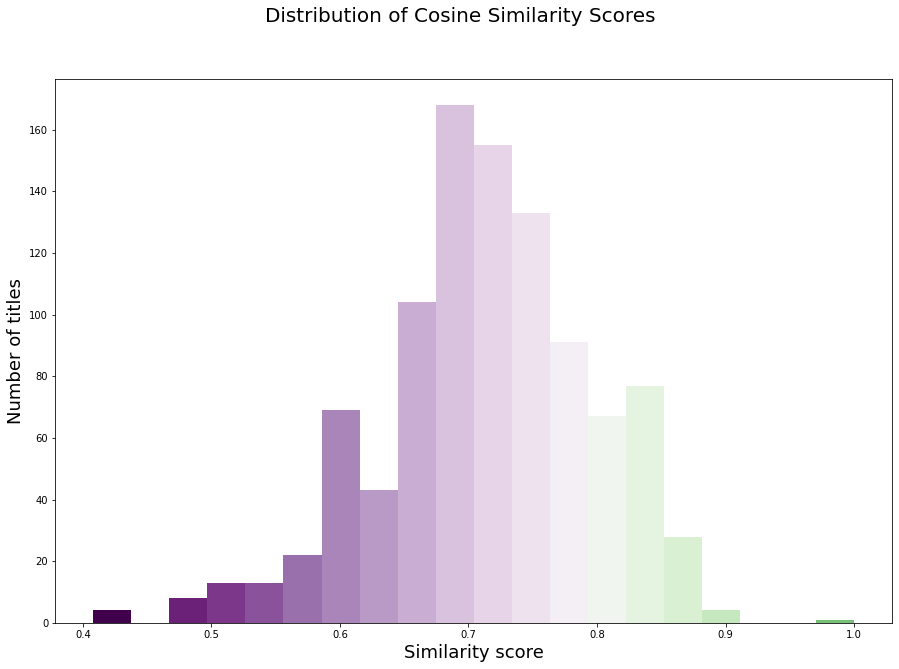

In [29]:
# Plot results.
fig = plt.figure(figsize=(15,10))
cm = plt.cm.PRGn
n, bins, patches = plt.hist(ex_similarity_scores_df['similarity_score'], 
                            20, color='green')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/25)) # notice the i/25
fig.suptitle('Distribution of Cosine Similarity Scores', fontsize=20)
plt.xlabel("Similarity score", fontsize=18)
plt.ylabel("Number of titles", fontsize=18)
plt.show()